In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl

import sys
sys.path.append('../../')


from Subroutines import spectral_radius
from ring import ring

# Load Data

In [2]:
data_file_names = ['Plain','UnconstrainedDAP','ConstrainedDAP','Parameters','UnconstrainedLearning_eta_0.5','SafeLearning_eta_0.5']

In [3]:
data = {}
for name in data_file_names:
    with open('./data/{}.pkl'.format(name),'rb') as f:
        data[name] = pkl.load(f)

In [4]:
with open('./data/Parameters.pkl','rb') as f:
        data['Parameters'] = pkl.load(f)


In [5]:
A = data['Parameters']['A']
H_benchmark = data['Parameters']['H_benchmark']

In [6]:
spectral_radius(A)**H_benchmark

0.08793321176890603

In [7]:
 data['Parameters']

{'Q': array([[1, 0],
        [0, 1]]),
 'R': array([[1.]]),
 'D_x': array([[ 1.,  0.],
        [ 0.,  1.],
        [-1., -0.],
        [-0., -1.]]),
 'd_x': array([ 5.5, 40. ,  5.5, 40. ]),
 'D_u': array([[ 1.],
        [-1.]]),
 'd_u': array([100., 100.]),
 'A': array([[ 1.        ,  0.1       ],
        [-0.00952261,  0.94007851]]),
 'B': array([[0. ],
        [0.1]]),
 'H': 20,
 'H_benchmark': 80,
 'eta_bars': [0.1, 0.5, 1.0, 1.5, 2.0],
 'w_max': 0.5}

# Plotting

## The plotting handler

In [8]:
def plot_with_errorband(ax,trial_data,label=''):
    mu = np.mean(trial_data,axis=0)
    std = np.std(trial_data,axis=0)

    indices = range(len(mu))

    ax.plot(np.array(mu),label=label)
    ax.fill_between(indices,mu+std,mu-std,alpha=0.2)

## x,v,u vs time

## A figure showing unconstraint LQR violates actual constraints, either in x or in u.

In [9]:
x_max = data['Parameters']['d_x'][0]
v_max = data['Parameters']['d_x'][1]
u_max = data['Parameters']['d_u'][0]

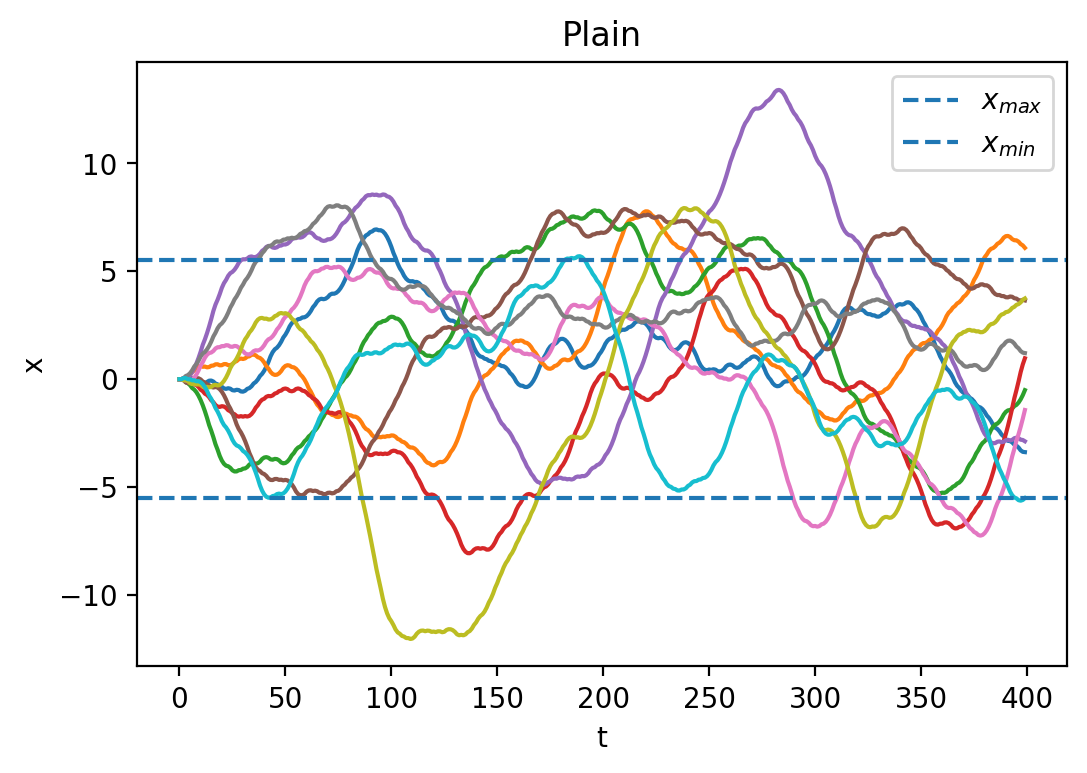

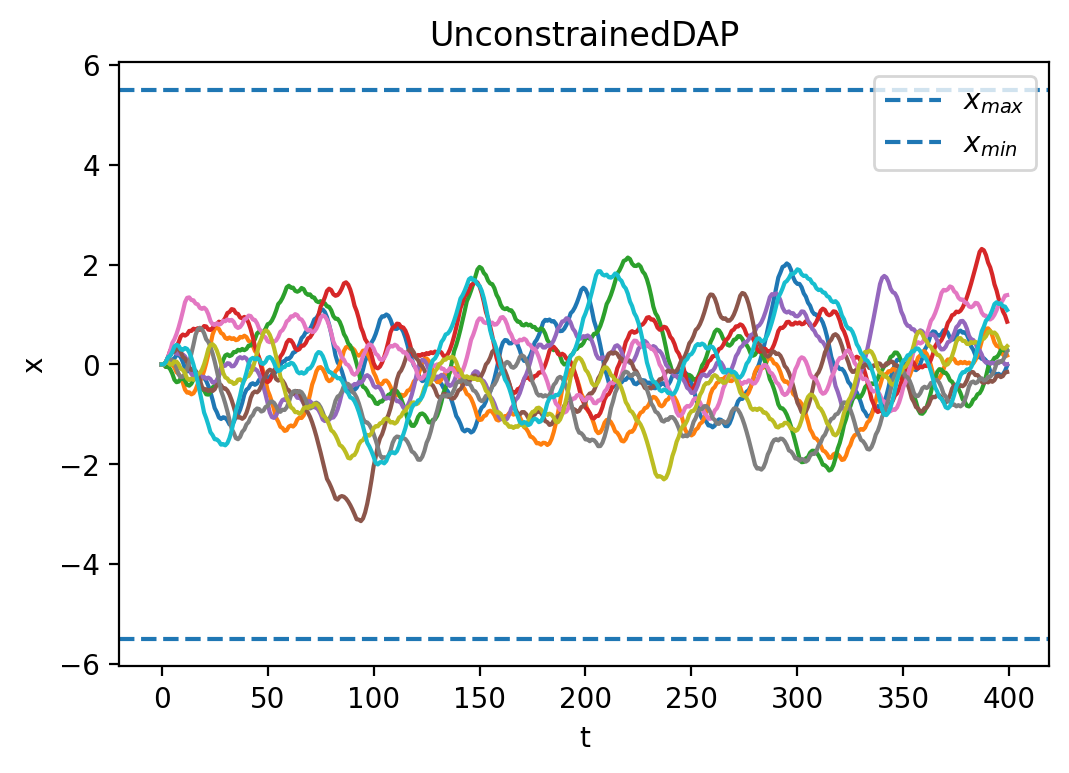

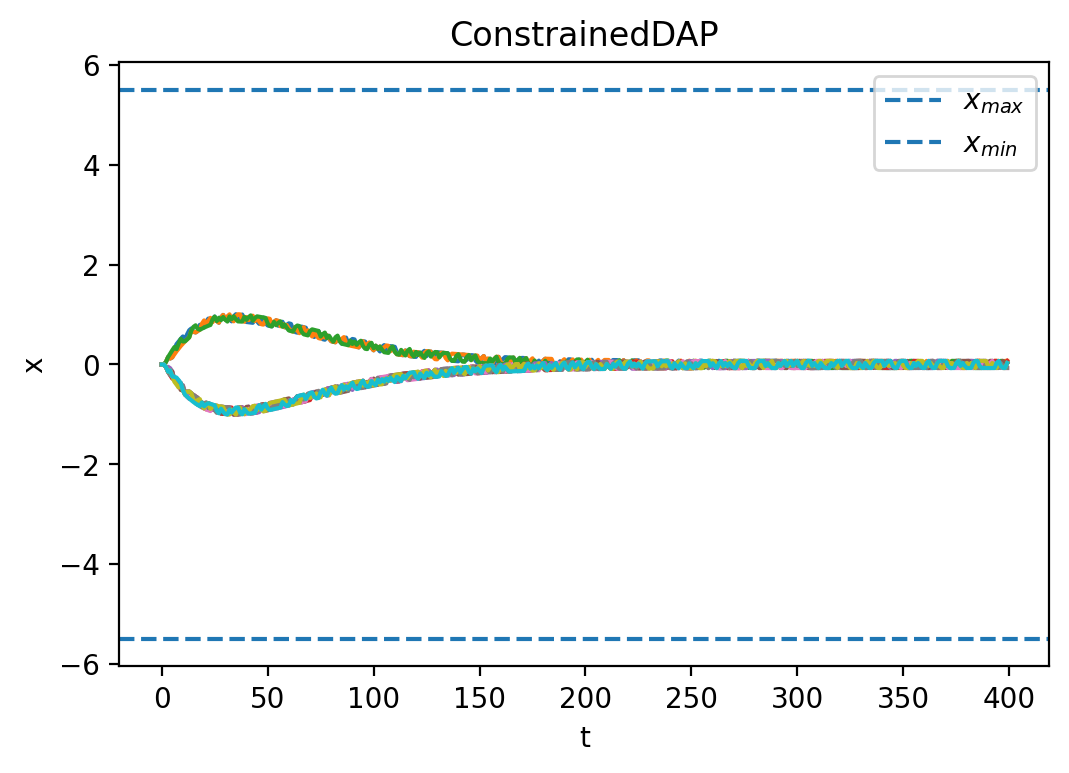

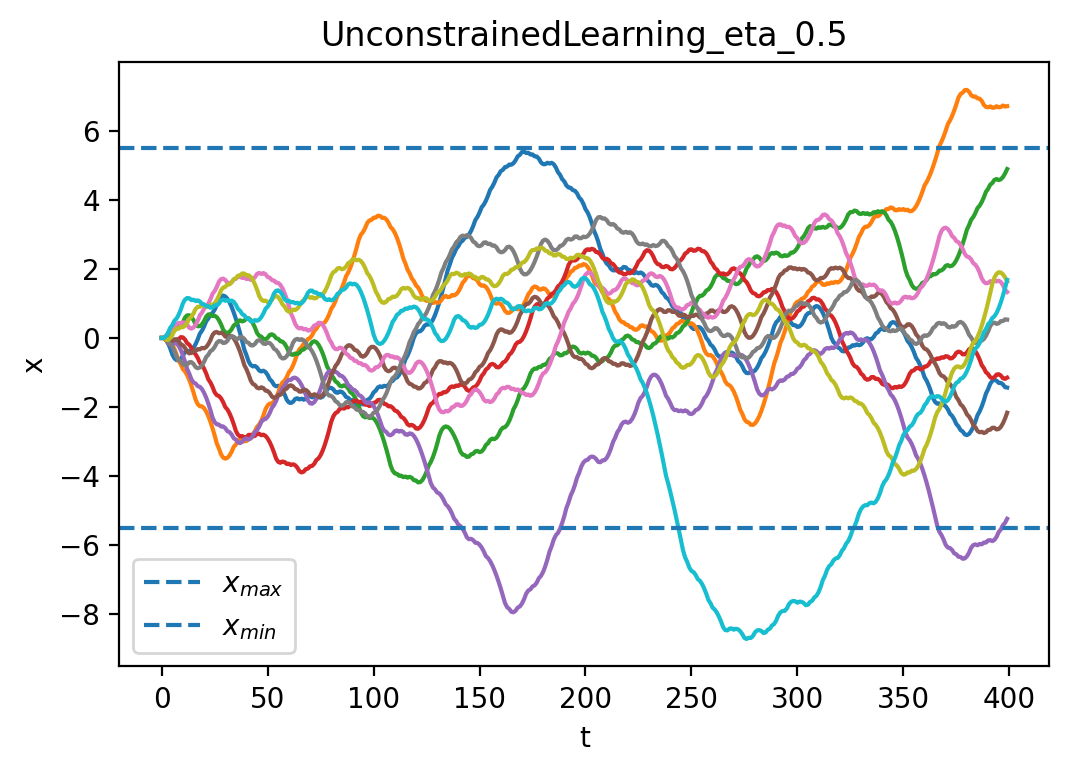

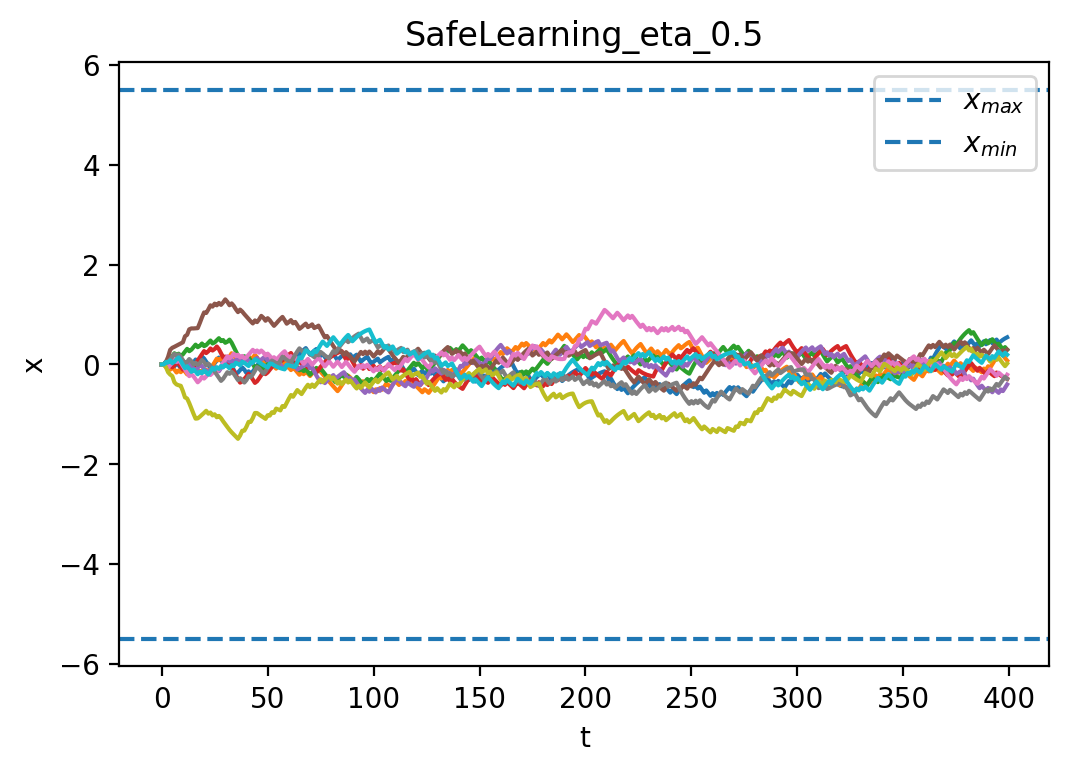

In [10]:
alg_names =  ['Plain','UnconstrainedDAP','ConstrainedDAP','UnconstrainedLearning_eta_0.5','SafeLearning_eta_0.5']

# alg_names =  ['UnconstrainedLearning','SafeLearning','Plain','UnconstrainedLQR','ConstrainedLQR']
# alg_names =  ['UnconstrainedLearning','SafeLearning','Plain']
# alg_names =  ['Plain','Benchmark']


for name in alg_names:
    
    plt.figure(dpi=200)
    ax = plt.gca()
#     print(name)
#     trial_data = [np.array(d['x'])[:,0,:].flatten() for d in data[name]]
    for d in data[name]:
        ax.plot(np.array(d['x'])[:,0,:].flatten())
#         print(np.array(d['x']).shape)
#         plt.show()
#     plot_with_errorband(ax,trial_data,name)

    ax.axhline(x_max,label=r'$x_{max}$',ls='dashed')
    ax.axhline(-x_max,label=r'$x_{min}$',ls='dashed')
    
    ax.set_title(name)
    
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.legend()


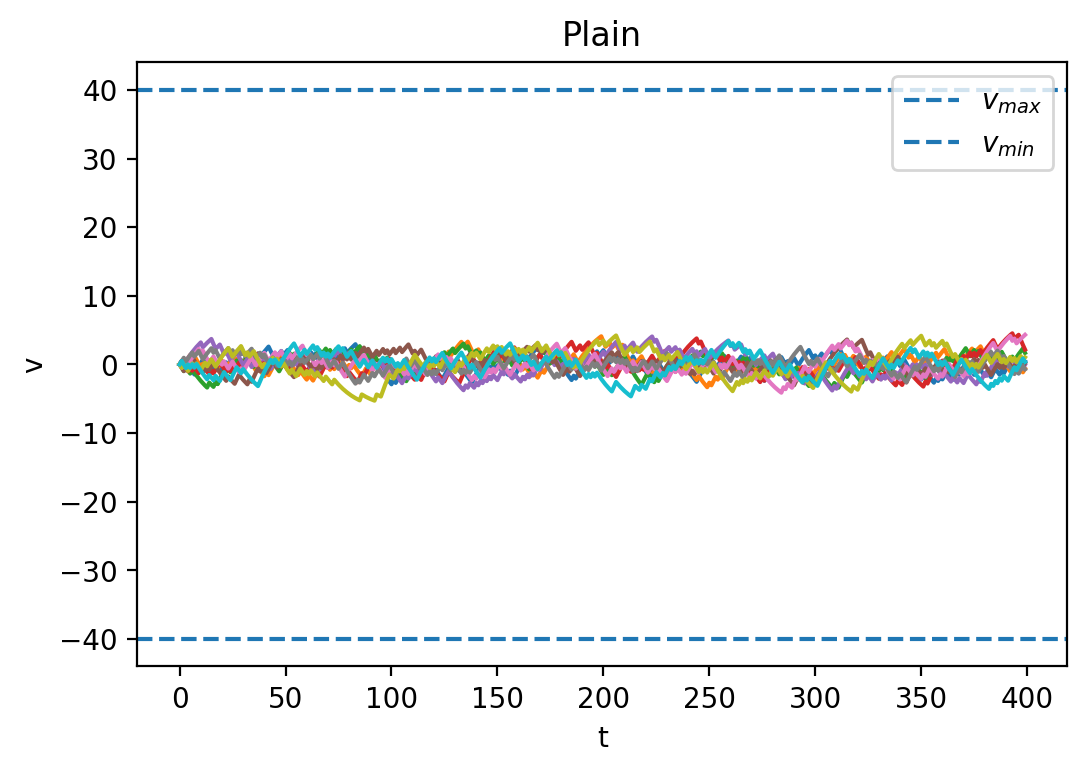

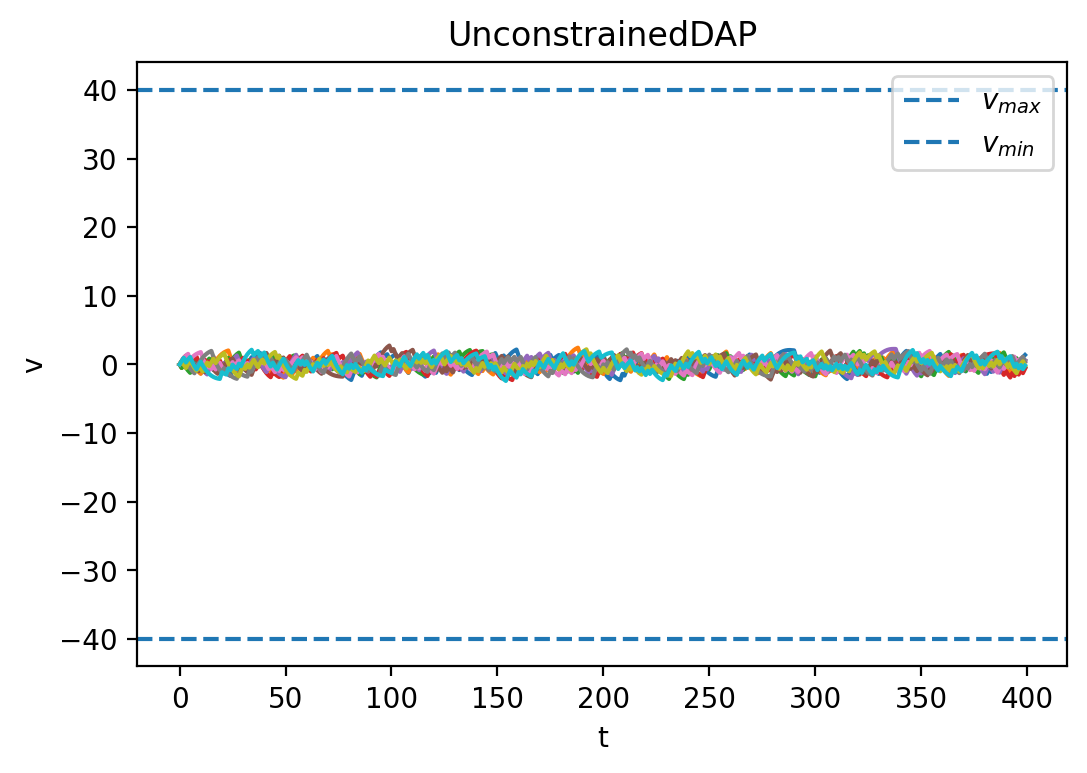

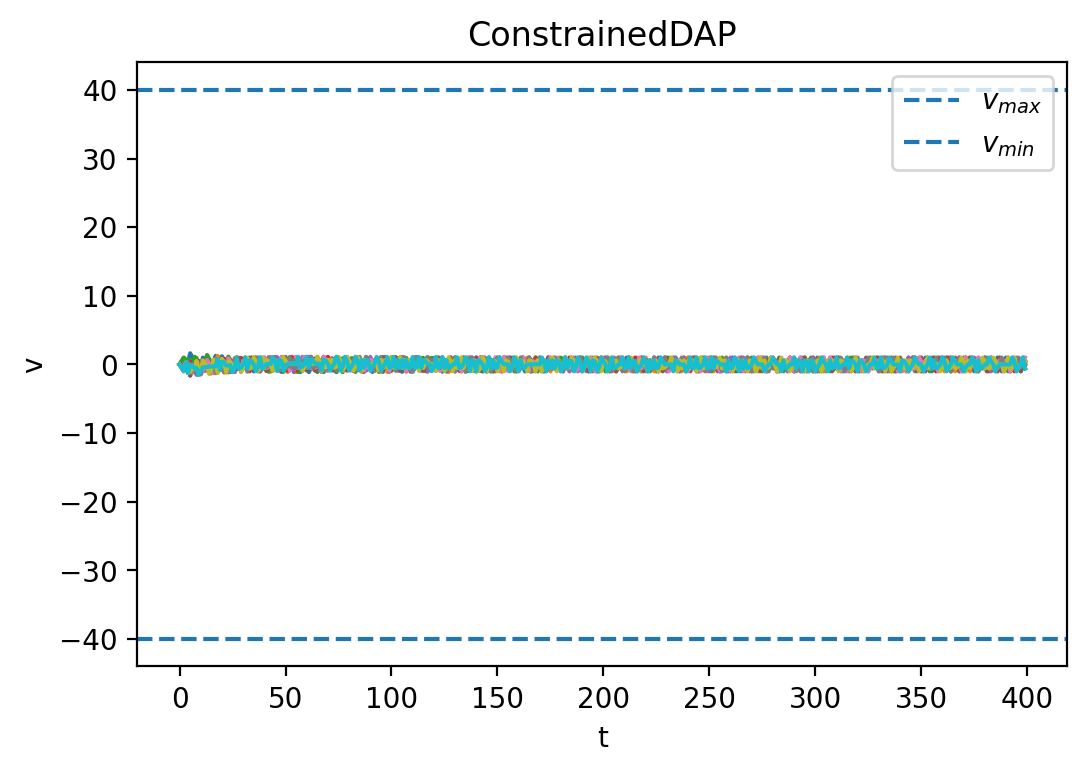

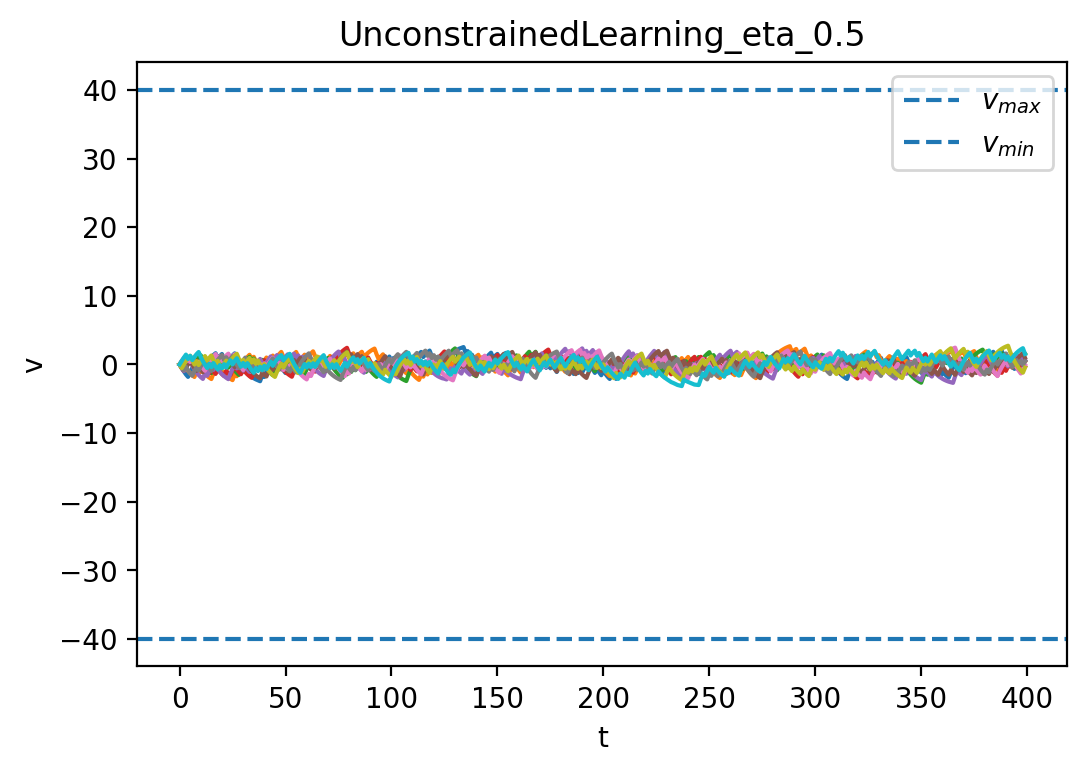

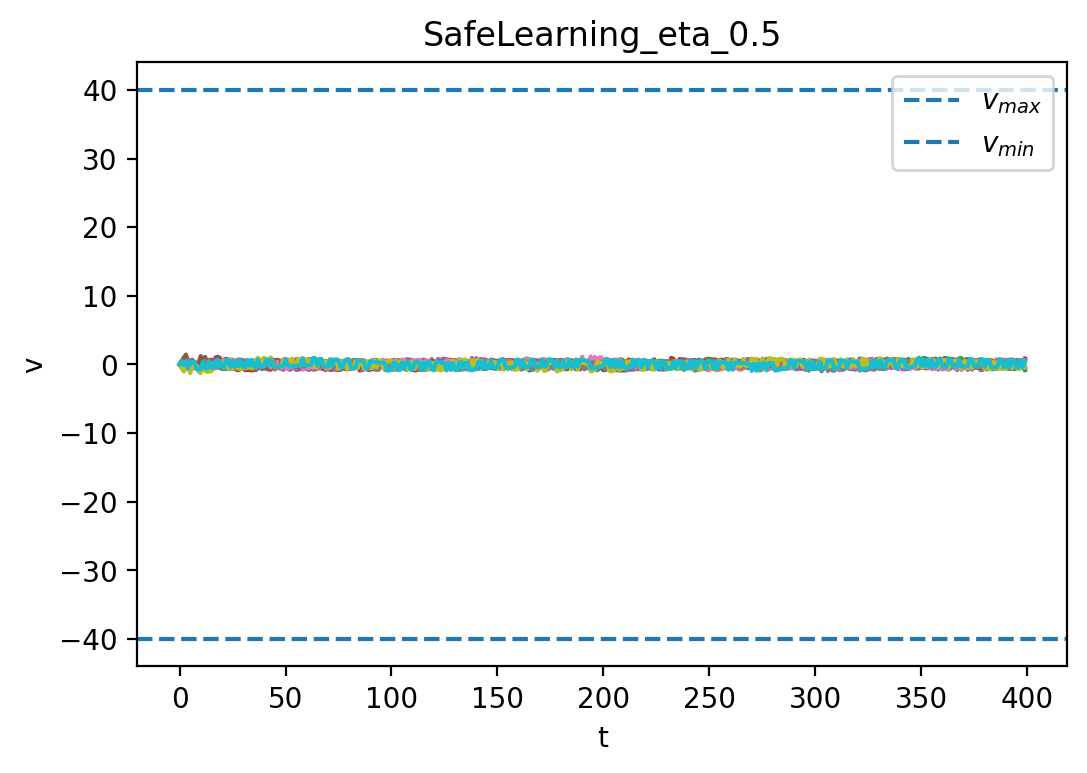

In [11]:
for name in alg_names:
    
    plt.figure(dpi=200)
    ax = plt.gca()
#     print(name)
#     trial_data = [np.array(d['x'])[:,0,:].flatten() for d in data[name]]
    for d in data[name]:
        ax.plot(np.array(d['x'])[:,1,:].flatten())
#         print(np.array(d['x']).shape)
#         plt.show()
#     plot_with_errorband(ax,trial_data,name)

    ax.axhline(v_max,label=r'$v_{max}$',ls='dashed')
    ax.axhline(-v_max,label=r'$v_{min}$',ls='dashed')
    
    ax.set_title(name)
    
    ax.set_xlabel('t')
    ax.set_ylabel('v')
    ax.legend()


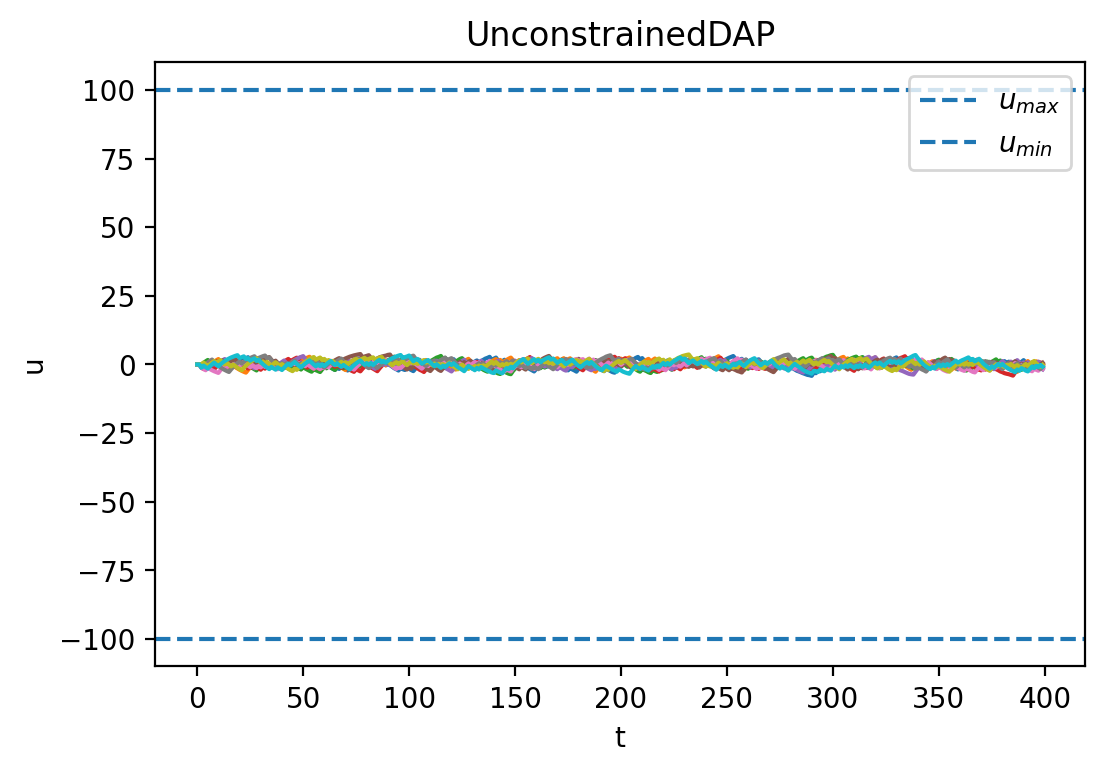

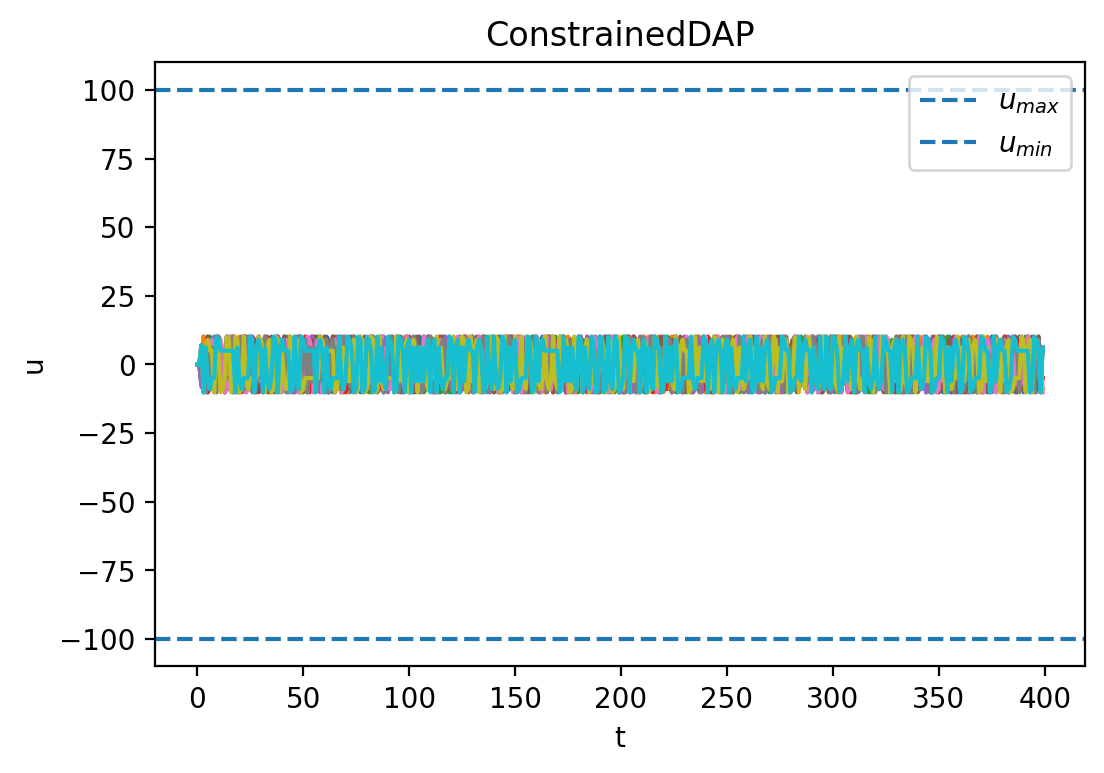

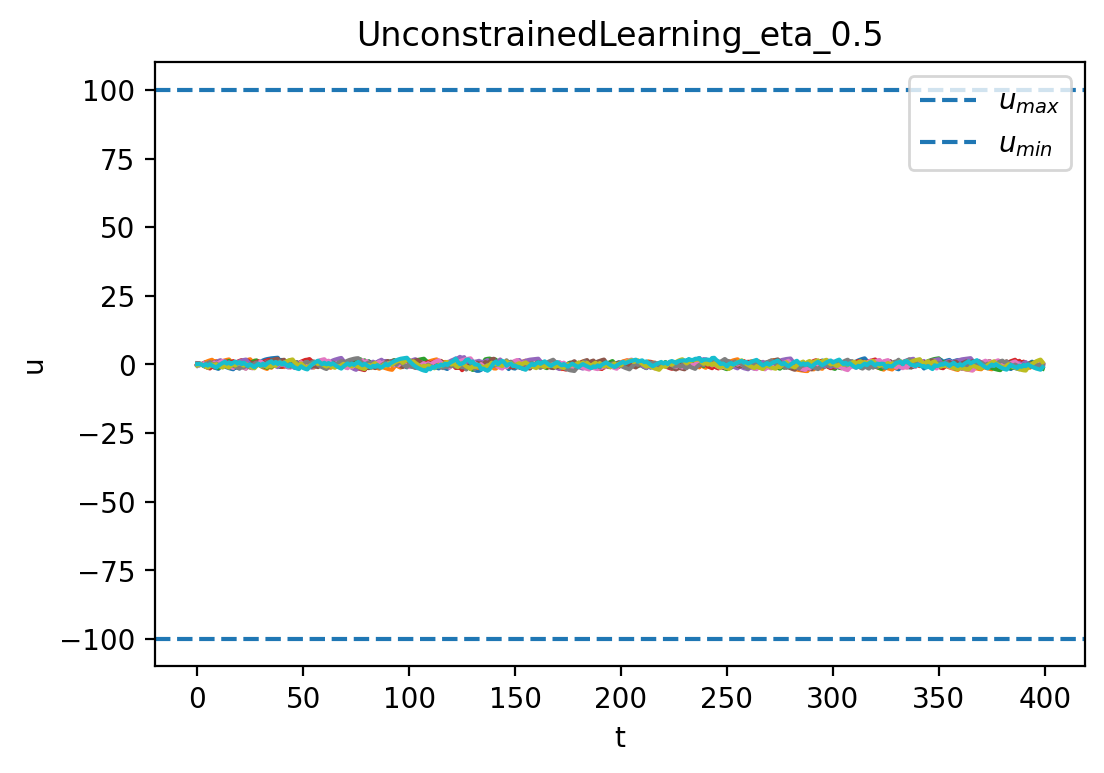

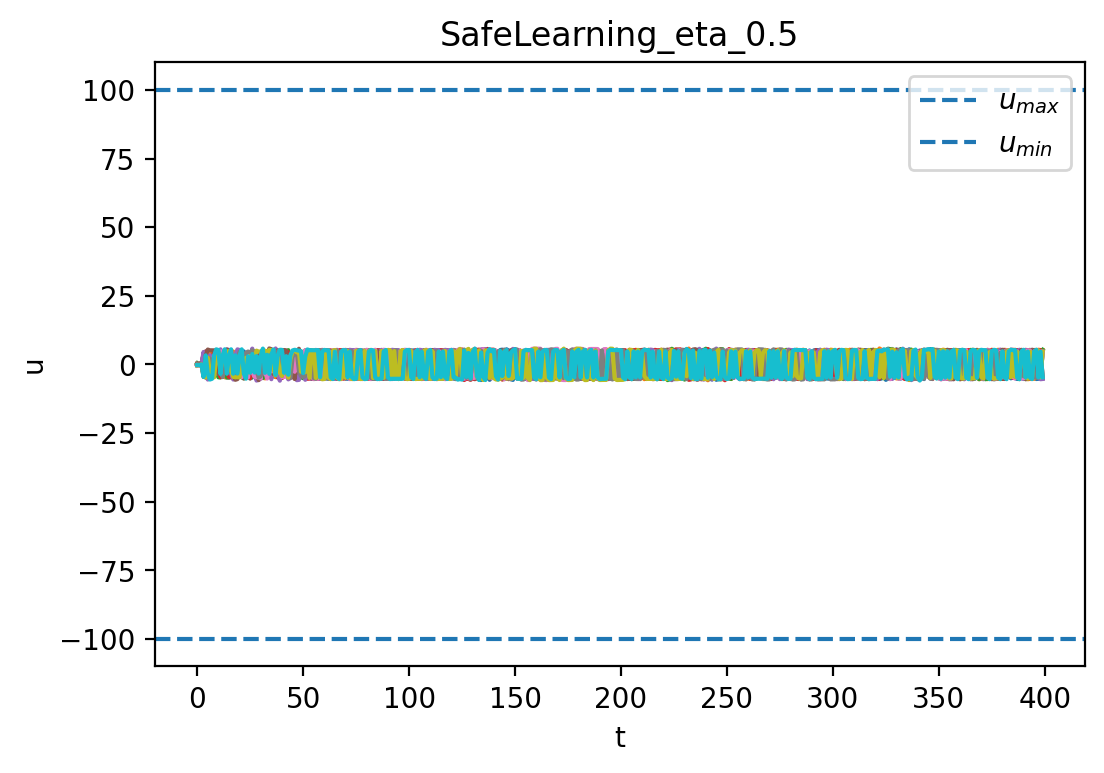

In [13]:
# control_alg = ['SafeLearning','UnconstrainedLearning']
control_alg = ['UnconstrainedDAP','ConstrainedDAP','UnconstrainedLearning_eta_0.5','SafeLearning_eta_0.5']
for name in control_alg:
    
    plt.figure(dpi=200)
    ax = plt.gca()
#     print(name)
#     trial_data = [np.array(d['x'])[:,0,:].flatten() for d in data[name]]
    for d in data[name]:
        ax.plot(np.array(d['u']).flatten())
#         print(np.array(d['x']).shape)
#         plt.show()
#     plot_with_errorband(ax,trial_data,name)

    ax.axhline(u_max,label=r'$u_{max}$',ls='dashed')
    ax.axhline(-u_max,label=r'$u_{min}$',ls='dashed')
    
    ax.set_title(name)
    
    ax.set_xlabel('t')
    ax.set_ylabel('u')
    ax.legend()

    
